# Reading,cleaning and understanding the Source Data

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import MinMaxScaler as ms
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn import metrics

In [3]:
lead_score = pd.read_csv('/Users/shubhamkinger/Downloads/Lead Scoring Assignment/Leads.csv')
lead_score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
lead_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
lead_score.shape

(9240, 37)

In [6]:
lead_score.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
lead_score.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [8]:
#creating single function to drop cols
def drop_cols_df(df,cols_list):
    for col in cols_list:
        df.drop(col, axis =1, inplace=True)

In [9]:
#dropping columns containing large number of null values
cols_drop = ['Asymmetrique Profile Score','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Activity Index','Lead Quality','Tags']
drop_cols_df(lead_score,cols_drop)
    

In [10]:
lead_score.shape

(9240, 31)

In [11]:
lead_score.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [12]:
#dropping unnecessary columns from the dataset:
cols_drop = ['Prospect ID','Lead Number','City','Country']
drop_cols_df(lead_score,cols_drop)

In [13]:
lead_score.shape

(9240, 27)

In [14]:
lead_score.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement       

In [15]:
#Check which cols conatin the 'Select' value - this is nothing but possess null values
for col in lead_score.columns:
    print(lead_score[col].value_counts())
    print('*******')

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
*******
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64
*******
No     8506
Yes     734
Name: Do Not Email, dtype: int64
*******
No     9238
Yes       2
Name: Do Not Call, dtype: int64
*******
0    5679
1    3561
Name: Converted, dtype: int64
*******
0.0      2189
2.0      1680

In [16]:
#Inference is >> cols contain the 'select' value
col_select_value = ['Specialization','How did you hear about X Education','Lead Profile',]
for col in col_select_value:
    print(lead_score[col].value_counts())
    print('*****')

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64
*****
Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple So

In [17]:
#dropping cols contaning high percentage of 'select' values:
high_select_cols = ['Lead Profile','How did you hear about X Education']
drop_cols_df(lead_score,high_select_cols)

In [18]:
lead_score.shape

(9240, 25)

In [19]:
for col in lead_score.columns:
    print(lead_score[col].value_counts())
    print('*******')

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
*******
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64
*******
No     8506
Yes     734
Name: Do Not Email, dtype: int64
*******
No     9238
Yes       2
Name: Do Not Call, dtype: int64
*******
0    5679
1    3561
Name: Converted, dtype: int64
*******
0.0      2189
2.0      1680

In [20]:
#dropping cols which are not making sense from the data segregation perspective - like one value count is too large as compared to the other value in the same col
cols_data_inapp = [ 'Through Recommendations', 'What matters most to you in choosing a course','Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content',
            'I agree to pay the amount through cheque','Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement',]

drop_cols_df(lead_score,cols_data_inapp)


In [21]:
lead_score.shape

(9240, 12)

In [22]:
lead_score.isnull().sum()

Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Specialization                            1438
What is your current occupation           2690
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [23]:
lead_score = lead_score[~lead_score['What is your current occupation'].isnull()]

In [24]:
lead_score.shape

(6550, 12)

In [25]:
lead_score.isnull().sum()

Lead Origin                                 0
Lead Source                                36
Do Not Email                                0
Converted                                   0
TotalVisits                               130
Total Time Spent on Website                 0
Page Views Per Visit                      130
Last Activity                             103
Specialization                             18
What is your current occupation             0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

In [26]:
#dropping rows containing small number of null values
lead_score = lead_score[~lead_score['Page Views Per Visit'].isnull()]

In [27]:
lead_score.shape

(6420, 12)

In [28]:
lead_score.isnull().sum()

Lead Origin                                0
Lead Source                               29
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
Specialization                            18
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [29]:
lead_score = lead_score[lead_score['Specialization'] !='Select']
lead_score.Specialization.value_counts()

Finance Management                   748
Human Resource Management            666
Marketing Management                 664
Operations Management                392
Business Administration              310
IT Projects Management               278
Supply Chain Management              275
Banking, Investment And Insurance    266
Media and Advertising                161
Travel and Tourism                   149
International Business               136
Healthcare Management                123
Hospitality Management                90
E-COMMERCE                            80
Retail Management                     78
Rural and Agribusiness                58
E-Business                            43
Services Excellence                   25
Name: Specialization, dtype: int64

In [30]:
lead_score = lead_score[~lead_score['Lead Source'].isnull()]
lead_score = lead_score[~lead_score['Specialization'].isnull()]

In [31]:
lead_score.isnull().sum()

Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [32]:
lead_score.shape

(4535, 12)

In [33]:
lead_score.shape

(4535, 12)

In [34]:
lead_score.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,4535.000000,4535.000000,4535.000000,4535.000000
mean,0.510695,4.293716,626.625358,2.937385
std,0.499941,5.451975,568.094959,2.143495
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,127.000000,2.000000
50%,1.000000,3.000000,391.000000,2.670000
75%,1.000000,5.000000,1119.500000,4.000000
max,1.000000,251.000000,2272.000000,55.000000


In [35]:
#Calculating the Imbalance ratio
convert_zero = lead_score.loc[lead_score['Converted'] ==0]
convert_one = lead_score.loc[lead_score['Converted'] ==1]
imb_ratio = round(len(convert_zero)/len(convert_one),2)
imb_ratio

0.96

# Visualizing the Data

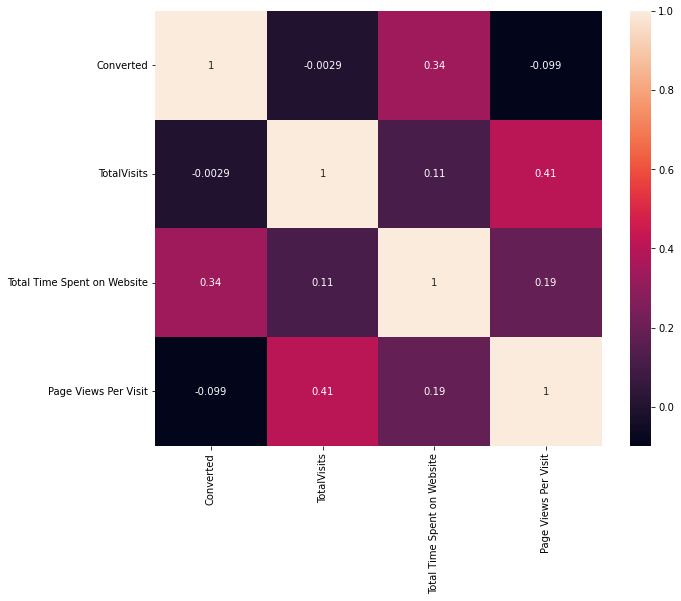

In [36]:
#Checking the correlation among varibles
plt.figure(figsize=(10,8))
sns.heatmap(lead_score.corr(),annot = True)
plt.show()

In the Heatmap above we can see, 'Total time spent on Websitr' has a direct correlation with 'Converted'

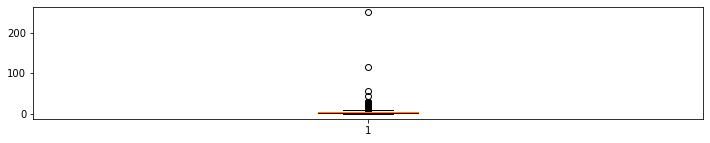

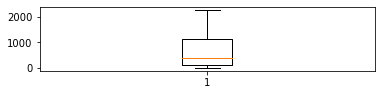

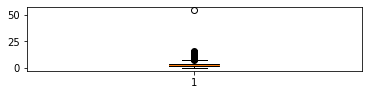

In [37]:
#checking the outliers
plt.figure(figsize = (12,7))

plt.subplot(3,1,1)
plt.boxplot(x = 'TotalVisits', data = lead_score)
plt.show()

plt.subplot(3,1,2)
plt.boxplot(x = 'Total Time Spent on Website', data = lead_score)
plt.show()

plt.subplot(3,1,3)
plt.boxplot(x = 'Page Views Per Visit', data = lead_score)
plt.show()

In the above boxplots,we can see there are not much of the outliers in the numerical cols which can affect our observations

# Handling Dummy Variables

In [38]:
dummy_col_list = list(lead_score.loc[:,lead_score.dtypes == 'object'].columns)

In [39]:
dummy_col_list

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [40]:
#create dummies
dummy_vars = pd.get_dummies(lead_score[dummy_col_list],drop_first= True)

In [41]:
dummy_vars

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2,1,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
10,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
11,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9234,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9235,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9236,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9237,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [42]:
dummy_vars.columns

Index(['Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_Welingak Website',
       'Lead Source_bing', 'Lead Source_testone', 'Do Not Email_Yes',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last 

In [43]:
lead_score = pd.concat([lead_score,dummy_vars],axis = 1)

In [44]:
lead_score.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.00,Email Opened,Business Administration,Student,...,1,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.00,Unreachable,Media and Advertising,Unemployed,...,0,0,0,1,0,0,0,0,0,0
6,Landing Page Submission,Google,No,1,2.0,1640,2.00,Email Opened,Supply Chain Management,Unemployed,...,0,0,0,1,0,0,0,0,0,0
10,Landing Page Submission,Organic Search,No,1,8.0,1351,8.00,Email Opened,Travel and Tourism,Unemployed,...,1,0,0,0,0,0,0,0,0,0
11,Landing Page Submission,Direct Traffic,No,1,8.0,1343,2.67,Page Visited on Website,Human Resource Management,Unemployed,...,0,0,0,0,0,1,0,0,0,0


In [45]:
#dropping the actual categoirical cols
drop_cols_df(lead_score,dummy_col_list)

In [46]:
lead_score.shape

(4535, 73)

# Preparing the Model

In [47]:
#Train Test split
X = lead_score.drop('Converted',axis =1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2,2.0,1532,2.00,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1.0,305,1.00,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6,2.0,1640,2.00,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
10,8.0,1351,8.00,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
11,8.0,1343,2.67,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [48]:
X.shape

(4535, 72)

In [49]:
lead_score.shape

(4535, 73)

In [50]:
Y = lead_score['Converted']
Y.head()

2     1
3     0
6     1
10    1
11    1
Name: Converted, dtype: int64

In [51]:
Y.shape

(4535,)

In [52]:
X_train,X_test,y_train,y_test = tts(X,Y,train_size = 0.7,test_size = 0.3, random_state = 100)

In [54]:
X_train.shape

(3174, 72)

In [55]:
y_train.shape

(3174,)

In [56]:
X_test.shape

(1361, 72)

In [57]:
y_test.shape

(1361,)

In [58]:
#Scaling of the numerical variables
num_cols = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
scaler = ms()
lead_score[num_cols] = scaler.fit_transform(lead_score[num_cols])

In [59]:
lead_score.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2,1,0.007968,0.674296,0.036364,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0.003984,0.134243,0.018182,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
6,1,0.007968,0.721831,0.036364,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
10,1,0.031873,0.594630,0.145455,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
11,1,0.031873,0.591109,0.048545,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


# Building a Logistic Regression Model

In [60]:
#creating logistic regression object
lrm = LogisticRegression()

In [61]:
#eliminating columns using Recursive feature elimination
rfe = RFE(lrm,15)
rfe = rfe.fit(X_train,y_train)

/Users/shubhamkinger/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/Users/shubhamkinger/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/shubhamkinger/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge

/Users/shubhamkinger/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/shubhamkinger/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

In [62]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', False, 41),
 ('Total Time Spent on Website', False, 56),
 ('Page Views Per Visit', False, 40),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', False, 3),
 ('Lead Origin_Lead Import', False, 20),
 ('Lead Source_Direct Traffic', False, 29),
 ('Lead Source_Facebook', False, 5),
 ('Lead Source_Google', False, 15),
 ('Lead Source_Olark Chat', False, 54),
 ('Lead Source_Organic Search', False, 39),
 ('Lead Source_Pay per Click Ads', False, 24),
 ('Lead Source_Press_Release', False, 51),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 7),
 ('Lead Source_Social Media', False, 28),
 ('Lead Source_WeLearn', False, 12),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 38),
 ('Lead Source_testone', False, 26),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 22),
 ('Last Activity_

In [63]:
cols_to_keep = list(X_train.columns[rfe.support_])
cols_to_keep

['Lead Origin_Landing Page Submission',
 'Lead Source_Reference',
 'Lead Source_Welingak Website',
 'Do Not Email_Yes',
 'Last Activity_Converted to Lead',
 'Last Activity_Email Bounced',
 'Last Activity_Had a Phone Conversation',
 'Last Activity_Olark Chat Conversation',
 'What is your current occupation_Housewife',
 'What is your current occupation_Unemployed',
 'What is your current occupation_Working Professional',
 'Last Notable Activity_Email Link Clicked',
 'Last Notable Activity_Email Opened',
 'Last Notable Activity_Modified',
 'Last Notable Activity_Page Visited on Website']

In [64]:
X_train = X_train[cols_to_keep]
X_train

,Lead Origin_Landing Page Submission,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,What is your current occupation_Housewife,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Page Visited on Website
2006,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0
5140,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0
7588,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
5244,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
8663,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8514,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4243,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
942,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
164,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0


# Fitting the Logistic Regression model

In [65]:
#Creating a function to fit the model
def logisticRegressionModel(y_output,X_input):
    X_train_sm = sm.add_constant(X_input)
    lrmodel = sm.GLM(y_output,X_train_sm)
    res = lrmodel.fit()
    return res

In [66]:
lr_res = logisticRegressionModel(y_train,X_train)

/Users/shubhamkinger/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [67]:
lr_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3174
Model:                            GLM   Df Residuals:                     3158
Model Family:                Gaussian   Df Model:                           15
Link Function:               identity   Scale:                         0.18572
Method:                          IRLS   Log-Likelihood:                -1823.9
Date:                Mon, 13 Jun 2022   Deviance:                       586.49
Time:                        00:15:36   Pearson chi2:                     586.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.9184      0.049     18.682      0.000       0.822       1.015
Lead Origin_Landing Page Submission                     -0.2071      0.023     -8.935      0.000      -0.253      -0.162
Lead Source_Reference                                    0.1428      0.036      3.926      0.000       0.072       0.214
Lead Source_Welingak Website                             0.3794      0.145      2.609      0.009       0.094       0.664
Do Not Email_Yes                                        -0.3018      0.037     -8.102      0.000      -0.375      -0.229
Last Activity_Converted to Lead                         -0.2351      0.041     -5.757      0.000      -0.315      -0.155
Last Activity_Email Bounced                             -0.0769      0.058     -1.318      0.188      -0.191       0.037
Last Activity_Had a Phone Conversation                   0.2218      0.120      1.847      0.065      -0.014       0.457
Last Activity_Olark Chat Conversation                   -0.1829      0.051     -3.592      0.000      -0.283      -0.083
What is your current occupation_Housewife                0.3839      0.181      2.120      0.034       0.029       0.739
What is your current occupation_Unemployed              -0.1398      0.043     -3.217      0.001      -0.225      -0.055
What is your current occupation_Working Professional     0.2355      0.047      4.972      0.000       0.143       0.328
Last Notable Activity_Email Link Clicked                -0.3055      0.057     -5.365      0.000      -0.417      -0.194
Last Notable Activity_Email Opened                      -0.1819      0.019     -9.440      0.000      -0.220      -0.144
Last Notable Activity_Modified                          -0.2192      0.021    -10.261      0.000      -0.261      -0.177
Last Notable Activity_Page Visited on Website           -0.2041      0.043     -4.774      0.000      -0.288      -0.120
========================================================================================================================
"""

In the above summary we can see various columns having p-value way larger than 0.005

# Calculating the Variance Inflation Factor

In [68]:
#Creating a function to calculate VIF
def VarianceInflationFactor(X_input):
    vif = pd.DataFrame()
    vif['Features'] = X_input.columns
    vif['VIF'] = [variance_inflation_factor(X_input.values,i) for i in range(X_input.shape[1])]
    return vif.sort_values(by = 'VIF', ascending = False)

In [69]:
VarianceInflationFactor(X_train)

,Features,VIF
3,Do Not Email_Yes,1.721035
5,Last Activity_Email Bounced,1.629396
1,Lead Source_Reference,1.441769
4,Last Activity_Converted to Lead,1.221487
14,Last Notable Activity_Page Visited on Website,1.110874
7,Last Activity_Olark Chat Conversation,1.088934
11,Last Notable Activity_Email Link Clicked,1.057000
2,Lead Source_Welingak Website,1.021788
8,What is your current occupation_Housewife,1.017220
6,Last Activity_Had a Phone Conversation,1.009063


As we can see above, the VIF values seems fine but p-values are quite large. SO eliminating the cols which are possessing high p-values

In [70]:
#eliminating 'Last Activity_Email Bounced'
X_train.drop('Last Activity_Email Bounced', axis = 1, inplace = True)

In [71]:
lr_res = logisticRegressionModel(y_train,X_train)
lr_res.summary()

/Users/shubhamkinger/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3174
Model:                            GLM   Df Residuals:                     3159
Model Family:                Gaussian   Df Model:                           14
Link Function:               identity   Scale:                         0.18576
Method:                          IRLS   Log-Likelihood:                -1824.8
Date:                Mon, 13 Jun 2022   Deviance:                       586.82
Time:                        00:15:36   Pearson chi2:                     587.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.9199      0.049     18.714      0.000       0.824       1.016
Lead Origin_Landing Page Submission                     -0.2074      0.023     -8.948      0.000      -0.253      -0.162
Lead Source_Reference                                    0.1435      0.036      3.943      0.000       0.072       0.215
Lead Source_Welingak Website                             0.3805      0.145      2.616      0.009       0.095       0.666
Do Not Email_Yes                                        -0.3298      0.031    -10.789      0.000      -0.390      -0.270
Last Activity_Converted to Lead                         -0.2315      0.041     -5.680      0.000      -0.311      -0.152
Last Activity_Had a Phone Conversation                   0.2247      0.120      1.871      0.061      -0.011       0.460
Last Activity_Olark Chat Conversation                   -0.1806      0.051     -3.549      0.000      -0.280      -0.081
What is your current occupation_Housewife                0.3845      0.181      2.123      0.034       0.030       0.740
What is your current occupation_Unemployed              -0.1397      0.043     -3.214      0.001      -0.225      -0.054
What is your current occupation_Working Professional     0.2358      0.047      4.977      0.000       0.143       0.329
Last Notable Activity_Email Link Clicked                -0.3065      0.057     -5.382      0.000      -0.418      -0.195
Last Notable Activity_Email Opened                      -0.1832      0.019     -9.521      0.000      -0.221      -0.145
Last Notable Activity_Modified                          -0.2242      0.021    -10.659      0.000      -0.265      -0.183
Last Notable Activity_Page Visited on Website           -0.2006      0.043     -4.699      0.000      -0.284      -0.117
========================================================================================================================
"""

In [72]:
VarianceInflationFactor(X_train)

,Features,VIF
1,Lead Source_Reference,1.441198
4,Last Activity_Converted to Lead,1.215816
3,Do Not Email_Yes,1.159593
13,Last Notable Activity_Page Visited on Website,1.106039
6,Last Activity_Olark Chat Conversation,1.087486
10,Last Notable Activity_Email Link Clicked,1.056873
2,Lead Source_Welingak Website,1.021741
7,What is your current occupation_Housewife,1.017167
5,Last Activity_Had a Phone Conversation,1.008685
9,What is your current occupation_Working Profes...,0.807238


Vif values are still in limits. Eliminating 'Last Activity_Had a Phone Conversation	' as p-value >>>> 0.05

In [73]:
X_train.drop('Last Activity_Had a Phone Conversation', axis = 1, inplace = True)

In [74]:
lr_res = logisticRegressionModel(y_train,X_train)
lr_res.summary()

/Users/shubhamkinger/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3174
Model:                            GLM   Df Residuals:                     3160
Model Family:                Gaussian   Df Model:                           13
Link Function:               identity   Scale:                         0.18591
Method:                          IRLS   Log-Likelihood:                -1826.6
Date:                Mon, 13 Jun 2022   Deviance:                       587.47
Time:                        00:15:36   Pearson chi2:                     587.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.9221      0.049     18.756      0.000       0.826       1.018
Lead Origin_Landing Page Submission                     -0.2089      0.023     -9.011      0.000      -0.254      -0.163
Lead Source_Reference                                    0.1421      0.036      3.905      0.000       0.071       0.213
Lead Source_Welingak Website                             0.3780      0.146      2.598      0.009       0.093       0.663
Do Not Email_Yes                                        -0.3304      0.031    -10.805      0.000      -0.390      -0.270
Last Activity_Converted to Lead                         -0.2334      0.041     -5.728      0.000      -0.313      -0.154
Last Activity_Olark Chat Conversation                   -0.1830      0.051     -3.596      0.000      -0.283      -0.083
What is your current occupation_Housewife                0.3848      0.181      2.124      0.034       0.030       0.740
What is your current occupation_Unemployed              -0.1390      0.043     -3.197      0.001      -0.224      -0.054
What is your current occupation_Working Professional     0.2367      0.047      4.994      0.000       0.144       0.330
Last Notable Activity_Email Link Clicked                -0.3081      0.057     -5.410      0.000      -0.420      -0.196
Last Notable Activity_Email Opened                      -0.1848      0.019     -9.609      0.000      -0.222      -0.147
Last Notable Activity_Modified                          -0.2237      0.021    -10.635      0.000      -0.265      -0.182
Last Notable Activity_Page Visited on Website           -0.2020      0.043     -4.733      0.000      -0.286      -0.118
========================================================================================================================
"""

In [75]:
VarianceInflationFactor(X_train)

,Features,VIF
1,Lead Source_Reference,1.440904
4,Last Activity_Converted to Lead,1.215023
3,Do Not Email_Yes,1.159495
12,Last Notable Activity_Page Visited on Website,1.105752
5,Last Activity_Olark Chat Conversation,1.086945
9,Last Notable Activity_Email Link Clicked,1.056682
2,Lead Source_Welingak Website,1.021678
6,What is your current occupation_Housewife,1.017135
8,What is your current occupation_Working Profes...,0.805030
0,Lead Origin_Landing Page Submission,0.528841


It is clear that VIF values are well under limits. Now eliminating 'What is your current occupation_Housewife' as p-value approaches ~0.2

In [76]:
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

In [77]:
lr_res = logisticRegressionModel(y_train,X_train)
lr_res.summary()

/Users/shubhamkinger/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3174
Model:                            GLM   Df Residuals:                     3161
Model Family:                Gaussian   Df Model:                           12
Link Function:               identity   Scale:                         0.18611
Method:                          IRLS   Log-Likelihood:                -1828.8
Date:                Mon, 13 Jun 2022   Deviance:                       588.31
Time:                        00:15:36   Pearson chi2:                     588.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.9430      0.048     19.567      0.000       0.849       1.037
Lead Origin_Landing Page Submission                     -0.2092      0.023     -9.020      0.000      -0.255      -0.164
Lead Source_Reference                                    0.1423      0.036      3.909      0.000       0.071       0.214
Lead Source_Welingak Website                             0.3776      0.146      2.594      0.009       0.092       0.663
Do Not Email_Yes                                        -0.3305      0.031    -10.800      0.000      -0.390      -0.270
Last Activity_Converted to Lead                         -0.2340      0.041     -5.739      0.000      -0.314      -0.154
Last Activity_Olark Chat Conversation                   -0.1842      0.051     -3.618      0.000      -0.284      -0.084
What is your current occupation_Unemployed              -0.1600      0.042     -3.777      0.000      -0.243      -0.077
What is your current occupation_Working Professional     0.2156      0.046      4.650      0.000       0.125       0.307
Last Notable Activity_Email Link Clicked                -0.3085      0.057     -5.413      0.000      -0.420      -0.197
Last Notable Activity_Email Opened                      -0.1837      0.019     -9.552      0.000      -0.221      -0.146
Last Notable Activity_Modified                          -0.2235      0.021    -10.619      0.000      -0.265      -0.182
Last Notable Activity_Page Visited on Website           -0.2024      0.043     -4.739      0.000      -0.286      -0.119
========================================================================================================================
"""

In [78]:
VarianceInflationFactor(X_train)

,Features,VIF
1,Lead Source_Reference,1.435346
4,Last Activity_Converted to Lead,1.214982
3,Do Not Email_Yes,1.159410
11,Last Notable Activity_Page Visited on Website,1.105437
5,Last Activity_Olark Chat Conversation,1.086804
8,Last Notable Activity_Email Link Clicked,1.056460
2,Lead Source_Welingak Website,1.021567
7,What is your current occupation_Working Profes...,0.799906
0,Lead Origin_Landing Page Submission,0.525174
10,Last Notable Activity_Modified,0.273544


VIF values are pretty good. Now eliminating 'Lead Source_Welingak Website' as p-value >> 0.005


In [79]:
X_train.drop('Lead Source_Welingak Website', axis = 1, inplace = True)

In [80]:
lr_res = logisticRegressionModel(y_train,X_train)
lr_res.summary()

/Users/shubhamkinger/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3174
Model:                            GLM   Df Residuals:                     3162
Model Family:                Gaussian   Df Model:                           11
Link Function:               identity   Scale:                         0.18645
Method:                          IRLS   Log-Likelihood:                -1832.2
Date:                Mon, 13 Jun 2022   Deviance:                       589.56
Time:                        00:15:36   Pearson chi2:                     590.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.9502      0.048     19.732      0.000       0.856       1.045
Lead Origin_Landing Page Submission                     -0.2176      0.023     -9.465      0.000      -0.263      -0.173
Lead Source_Reference                                    0.1345      0.036      3.704      0.000       0.063       0.206
Do Not Email_Yes                                        -0.3317      0.031    -10.834      0.000      -0.392      -0.272
Last Activity_Converted to Lead                         -0.2360      0.041     -5.783      0.000      -0.316      -0.156
Last Activity_Olark Chat Conversation                   -0.1889      0.051     -3.709      0.000      -0.289      -0.089
What is your current occupation_Unemployed              -0.1586      0.042     -3.740      0.000      -0.242      -0.075
What is your current occupation_Working Professional     0.2148      0.046      4.627      0.000       0.124       0.306
Last Notable Activity_Email Link Clicked                -0.3099      0.057     -5.433      0.000      -0.422      -0.198
Last Notable Activity_Email Opened                      -0.1837      0.019     -9.544      0.000      -0.221      -0.146
Last Notable Activity_Modified                          -0.2223      0.021    -10.555      0.000      -0.264      -0.181
Last Notable Activity_Page Visited on Website           -0.2031      0.043     -4.752      0.000      -0.287      -0.119
========================================================================================================================
"""

In [81]:
VarianceInflationFactor(X_train)

,Features,VIF
1,Lead Source_Reference,1.428481
3,Last Activity_Converted to Lead,1.214571
2,Do Not Email_Yes,1.159202
10,Last Notable Activity_Page Visited on Website,1.105437
4,Last Activity_Olark Chat Conversation,1.085881
7,Last Notable Activity_Email Link Clicked,1.056440
6,What is your current occupation_Working Profes...,0.796126
0,Lead Origin_Landing Page Submission,0.516716
9,Last Notable Activity_Modified,0.273210
8,Last Notable Activity_Email Opened,0.110254


# Prediction of the trained dataset

In [82]:
y_train_pred = lr_res.predict(sm.add_constant(X_train))
y_train_pred

/Users/shubhamkinger/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


2006    0.385140
5140    0.162839
7588    0.351752
5244    0.574053
8663    0.020020
          ...   
8514    0.351752
4243    0.370909
942     0.390322
164     0.390322
8099    1.115748
Length: 3174, dtype: float64

In [83]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred

array([0.38514029, 0.16283933, 0.35175222, ..., 0.39032191, 0.39032191,
       1.11574784])

In [84]:
y_train_prod_df = pd.DataFrame({'actual_lead_converted':y_train.values,'Probability_of_conversion':y_train_pred})
y_train_prod_df.head()

,actual_lead_converted,Probability_of_conversion
0,0,0.385140
1,0,0.162839
2,1,0.351752
3,0,0.574053
4,0,0.020020


In [85]:
#Let's set the cut off off at 0.45
y_train_prod_df['predict_lead_converted'] = y_train_prod_df.Probability_of_conversion.map(lambda x:1 if x>0.45 else 0)
y_train_prod_df

,actual_lead_converted,Probability_of_conversion,predict_lead_converted
0,0,0.385140,0
1,0,0.162839,0
2,1,0.351752,0
3,0,0.574053,1
4,0,0.020020,0
...,...,...,...
3169,1,0.351752,0
3170,0,0.370909,0
3171,1,0.390322,0
3172,1,0.390322,0


# Model Evaluation

In [86]:
#Lets check the confusin Matrix
conf_matrix = metrics.confusion_matrix(y_train_prod_df['actual_lead_converted'],y_train_prod_df['predict_lead_converted'])
conf_matrix


array([[1154,  399],
       [ 496, 1125]])

In [87]:
#Accuracy Measure
metrics.accuracy_score(y_train_prod_df['actual_lead_converted'],y_train_prod_df['predict_lead_converted'])

0.7180214240705735

Getting an accuracy score of 73 is quite good. But we have to see other meaures as well in order to declare this as our final model

In [88]:
#calculating the sensitivity and specificity
TP = conf_matrix[1,1]
TN = conf_matrix[0,0]
FP = conf_matrix[0,1]
FN = conf_matrix[1,0]

In [89]:
sensitivity = TP/(TP+FN)
sensitivity

0.6940160394818014

In [90]:
specificity = TN/(TN+ FP)
specificity

0.7430779137153896

In [91]:
#Precision and Recall

In [92]:
precision = TP/(TP+FP)
precision

0.7381889763779528

In [93]:
recall = TP/(TP+FN)
recall

0.6940160394818014

We have got quite good values for sensitivity and specificity for threshold cut off at 0.45

# Prediction on Test data

In [94]:
#scaling
num_cols_scaling = ['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']
X_test[num_cols_scaling] = scaler.transform(X_test[num_cols_scaling])

/Users/shubhamkinger/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [95]:
cols = X_train.columns
cols

Index(['Lead Origin_Landing Page Submission', 'Lead Source_Reference',
       'Do Not Email_Yes', 'Last Activity_Converted to Lead',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

In [96]:
X_test = X_test[cols]

In [97]:
X_test.head()

,Lead Origin_Landing Page Submission,Lead Source_Reference,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Olark Chat Conversation,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Page Visited on Website
8536,1,0,0,0,0,1,0,0,0,0,0
945,0,0,0,1,0,1,0,0,0,1,0
1550,0,1,0,0,0,1,0,0,0,1,0
8570,1,0,0,0,0,0,1,0,0,0,0
1410,1,0,0,0,0,1,0,0,1,0,0


In [98]:
X_test.shape

(1361, 11)

In [99]:
y_test_pred = lr_res.predict(sm.add_constant(X_test))
y_test_pred

/Users/shubhamkinger/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


8536    0.574053
945     0.333334
1550    0.703856
8570    0.947375
1410    0.390322
          ...   
2718    0.351752
8201    0.351752
7328    0.574053
283     0.390322
5379    0.370909
Length: 1361, dtype: float64

In [100]:
y_test_pred = y_test_pred.values.reshape(-1)

In [101]:
y_test_pred_df = pd.DataFrame({'Actual_lead_converted':y_test.values,'Probability_of_conversion':y_test_pred})
y_test_pred_df

,Actual_lead_converted,Probability_of_conversion
0,0,0.574053
1,0,0.333334
2,1,0.703856
3,1,0.947375
4,0,0.390322
...,...,...
1356,0,0.351752
1357,0,0.351752
1358,1,0.574053
1359,0,0.390322


In [102]:
y_test_pred_df['Predicted_lead_conversion'] = y_test_pred_df.Probability_of_conversion.map(lambda x:1 if x>0.45 else 0)
y_test_pred_df.head()


,Actual_lead_converted,Probability_of_conversion,Predicted_lead_conversion
0,0,0.574053,1
1,0,0.333334,0
2,1,0.703856,1
3,1,0.947375,1
4,0,0.390322,0


In [103]:
#confusion Matrix
conf_matrix_test = metrics.confusion_matrix(y_test_pred_df['Actual_lead_converted'],y_test_pred_df['Predicted_lead_conversion'])
conf_matrix_test

array([[490, 176],
       [197, 498]])

In [104]:
#checking the accuracy of test data
metrics.accuracy_score(y_test_pred_df['Actual_lead_converted'],y_test_pred_df['Predicted_lead_conversion'])

0.7259368111682586

As we can see, we have obtained an accuracy score of 73% with out current model

In [105]:
#calculating sensitivity and specificity
TP = conf_matrix_test[1,1]
TN = conf_matrix_test[0,0]
FP = conf_matrix_test[0,1]
FN = conf_matrix_test[1,0]

In [106]:
#sensitivity
sensitivity_test = TP/(TP+FN)
sensitivity_test

0.7165467625899281

In [107]:
#specificity
specificity_test = TN/(TN+FP)
specificity_test

0.7357357357357357

Hence, we obtained sensitivity of 72% and specificity of 74% with out current logistic regression model which is quite satisfactory

In [108]:
#Precision and Recall

In [109]:
precision = TP/(TP+FP)
precision

0.7388724035608308

In [110]:
recall = TP/(TP+FN)
recall

0.7165467625899281

Hence, we obtained Precision of 74% and recall of 72% with out current logistic regression model which is quite satisfactory


X Education can make use of the following points in order to convert their leads into successfull leads:
1. It is observed that those who working professionals are more prone to opt for the courses
2. Also, those having email clicked/opened can also be taken into consideration for the succcessful lead
3. Those who vists the website and spend considerable amount of time there, can be approached to convert them into successful leads
4. When the last activity is Olark Chat conversation, then there are high chances of them getting converted into successful leads

        
        